In [469]:
pilhas = [[2], [4, 1], [3]]

In [470]:
max_len = max([len(k) for k in l])

In [471]:
_ = [pilha.append(" ") for pilha in pilhas if len(pilha) < max_len]

In [473]:
print(pilhas)

[[2, ' '], [4, 1], [3, ' ']]


In [477]:
for i in range(max_len-1, -1, -1):
    for pilha in pilhas:
        print(pilha[i], end=" ")
    print("")

  1   
2 4 3 


In [448]:
np.reshape(pilhas, (2, 3))

array([[2, 0, 4],
       [1, 3, 0]])

In [418]:
max_len

2

In [ ]:
for i in range(max_len):
    for pilha in pilhas:

In [430]:
for i in range(max_len):
    for pilha in pilhas:
        try:
            print(pilha[i], end=" ")
        except IndexError:
            print("/r")

2 4 3 /r
1 /r


In [ ]:
for i in range(max_len):
    for k 

# Stone V4 - Data Science

---

**Data:** 07/10/2021 \
**Prof.:** Gabriel R. Freitas

In [4]:
import pandas as pd
import numpy as np

import random
import statistics as st

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Probabilidade

### 1.1 Espaço Amostral

Chamamos de espaço amostral ao conjunto de todos os resultados possíveis de um certo fenômeno aleatório. Ele é muitas vezes representado pela letra grega $\omega$. Os subconjuntos de $\omega$ são denominados eventos e representados pelas letras latinas maiúsculas A,B< ... . O conjunto vazio é denotado por $\emptyset$.

A união de dois eventos A e B, denotado por A U B representa a ocorrência de pelo menos um dos eventos A ou B. A intersecção do evento A com B, denotado por $A \cap B$ é a ocorrência simultanea de A e B 

Dois eventos A e B são disjuntoss ou mutualmente exclusivos quando não têm elemento em comum. Isto é, $A \cap B$ =  $\emptyset$.


Dizemos que A e B são complementares se sua união é o espaço amostral e sua intersecção é vazia. O complementar de A será representado por $A^{c}$

<center><img src="misc/venn.png" width="500" height="350" /></center>

**Exemplo:** 

    1.1 - Lançamos uma moeda duas vezes, se C indicar cara e R indicar coroa então temos um espaço amostral:
    


In [25]:
w1 = ["CC", "CR", "RR", "RC"]

In [26]:
w1

['CC', 'CR', 'RR', 'RC']

In [27]:
eventos_com_r = 2
eventos_totais = 4

In [28]:
eventos_com_r / eventos_totais

0.5

    1.2 - Uma fábrica produz determinado artigo. Da linha de produção são retirados 3 artigos, e cada um é classificado como bom (B), ou defeituoso (D). Um espaço amostral do experimento é:

In [33]:
w2 = ["BBB", "BBD", "BDB", "DBB", "DDB", "DBD", "BDD", "DDD"]

Com exatamente duas defeituosas: 3/8 (37.5%)
Com no mínimo duas defeituosas: 4/8 (50%)

    1.3 - Um dado de seis faces (honesto) é lançado 2 vezes. Qual a probabilidade da soma dos números resultantes ser maior que 8?

In [43]:
possibilidades = []
somas = []

In [44]:
for primeiro_dado in range(1, 7):
    for segundo_dado in range(1, 7):

        # Apenda uma tupla de possibilidades
        possibilidade = (primeiro_dado, segundo_dado)
        possibilidades.append(possibilidade)

        # Apenda a soma dos valores dos dados
        soma = primeiro_dado + segundo_dado
        somas.append(soma)

In [47]:
somas = np.array(somas)

In [52]:
maiores_que_oito = len(somas[somas > 8])

In [53]:
total = len(somas)

In [56]:
maiores_que_oito / total

0.2777777777777778

### 1.2. Eventos Independentes & Probabilidade Condicional

#### Exercício - Idades/Compra

In [95]:
random.randint(2, 7) * 10

50

In [178]:
contagens = []

for _ in range(1000000):
    contagens.append(random.random() < 0.32)

In [179]:
sum(contagens)

320148

In [180]:
len(contagens)

1000000

In [181]:
sum(contagens) / len(contagens)

0.320148

In [64]:
usuarios = {
    20: 0,
    30: 0,
    40: 0,
    50: 0,
    60: 0,
    70: 0    
}

In [65]:
compras = {
    20: 0,
    30: 0,
    40: 0,
    50: 0,
    60: 0,
    70: 0    
}

In [182]:
total = 0

In [183]:
N = 100000
total = 0
anos = [20, 30, 40, 50, 60, 70]

for _ in range(N):
    ano = random.choice(anos)
    usuarios[ano] += 1

    p_compra = ano / 100
    
    if random.random() < p_compra:
        total += 1
        compras[ano] += 1

In [184]:
usuarios

{20: 16684, 30: 16636, 40: 16611, 50: 16884, 60: 16650, 70: 16536}

In [185]:
compras

{20: 3329, 30: 4896, 40: 6609, 50: 8394, 60: 9975, 70: 11469}

In [253]:
# prob. de ter uma comprar dado que o usuário tem 30 anos

p = compras[30] / usuarios[30]
print(f"P(compra | 30 anos) = {p}")

P(compra | 30 anos) = 0.29430151478720845


In [262]:
# prob. de uma compra ter sido realizada por um usuário de 30 anos
usuarios[30] / N

0.16636

In [267]:
numero_usuarios = N
total_de_compras = total

In [276]:
# prob. de qualquer usuário comprar o item
r = total_de_compras / numero_usuarios
print(r)

0.44672


### 1.4 Distribuições

[Apresentação modelo RFM de distribuições probabilísticas.](https://docs.google.com/presentation/d/11xhS3nA9XH-VtO2qWKb8wUkQVN75cbcVlxTDQoifvSU/edit?usp=sharing)

**Distribuição Binomial**

São n ensaios de Bernoulli com mesma probabilidade de sucesso e independentes, ou seja, o resultado de um ensaio não influencia no resultado de outro ensaio.

Exemplo: uma moeda honesta é lançada 3 vezes. Cada lançamento é independente do outro e a probabilidade de cara (sucesso) será 0,5 em todos os lançamentos.

Deste exemplo, podemos nos perguntar: dado que a moeda é lançada 3 vezes qual é a probabilidade de se obter duas caras? Indiquemos o sucesso (cara) por Se fracasso (coroa) por F. Então estamos interessados na probabilidade do evento:

**Distribuição de Poisson**

É largamente empregada quando se deseja contar o número de eventos de certo tipo que ocorrem num intervalo de tempo.

Exemplos:

- Número de chamadas recebidas por um telefone durante 5 minutos;
- Número de falhas de um computador num dia de operação.

**Distribuição Normal (Gaussiana, sino)**

A curva de distribuição normal representa o comportamento de diversos processos nas empresas e muitos fenômenos comuns, como por exemplo, altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova.

A distribuição normal pode ser usada para aproximar distribuições discretas de probabilidade, como por exemplo a distribuição binomial. Além disso, a distribuição normal serve também como base para a inferência estatística clássica.  Nela, a média, mediana e moda dos dados possuem o mesmo valor. 

<center><img src="https://drive.google.com/uc?id=1tARyJcF351a8QhnQj6z4vkfkcv0FX2N-" width="500" height="450" /></center>

Usaremos a notação X ~ N($\mu$,$\sigma^2$) para representar uma V.A. com distribuição Normal de média $\mu$ e variância $\sigma^2$.

Segundo o Teorema Central do Limite, para grandes amostras, independentemente da distribuição da variável de interesse, a distribuição das médias amostrais serão aproximadamente normalmente distribuídas, e tenderão a uma distribuição normal à medida que o tamanho de amostra crescer. 

$\bar X$ ~ N($\mu$,$\frac{\sigma^2}{\sqrt{n}}$)

Sendo n = tamanho amostral.

### 1.5 Testes de Normalidade

In [279]:
df = pd.read_csv('dados/titanic.csv')

In [280]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [281]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

#### Histograma

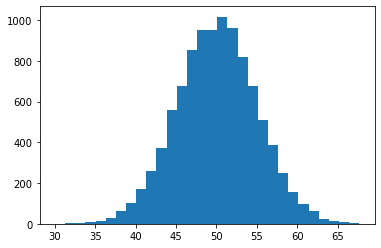

In [386]:
data_ficticio = 5 * np.random.randn(10000) + 50

plt.hist(data_ficticio, bins=30);

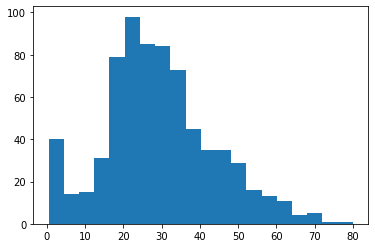

In [346]:
plt.hist(df.Age, bins=20);

#### Quantile-Quantile (QQ) Plot

In [353]:
from statsmodels.graphics.gofplots import qqplot

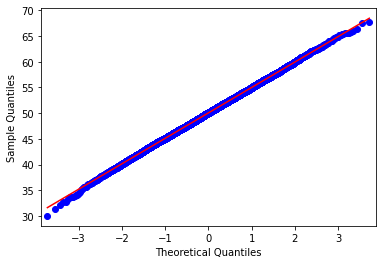

In [387]:
qqplot(data_ficticio, line="s");

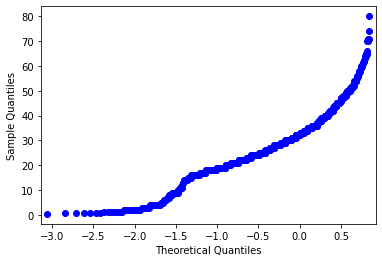

In [359]:
qqplot(df.Age, line="s");

#### Shapiro-Wilk

In [360]:
from scipy.stats import shapiro

In [389]:
stat, p = shapiro(data_ficticio)

In [390]:
alpha = 0.05

In [391]:
if p > alpha:
    print("Amostra parece gaussiana (falhou em rejeitar hipótese nula)")
else:
    print("Amostra não parece gaussiana (rejeitou hipótese)")

Amostra parece gaussiana (falhou em rejeitar hipótese nula)


In [392]:
stat, p = shapiro(df.Age)

In [393]:
alpha = 0.05

In [394]:
if p > alpha:
    print("Amostra parece gaussiana (falhou em rejeitar hipótese nula)")
else:
    print("Amostra não parece gaussiana (rejeitou hipótese)")

Amostra parece gaussiana (falhou em rejeitar hipótese nula)


In [411]:
stat, p = shapiro(df.PassengerId)

In [412]:
if p > alpha:
    print("Amostra parece gaussiana (falhou em rejeitar hipótese nula)")
else:
    print("Amostra não parece gaussiana (rejeitou hipótese)")

Amostra não parece gaussiana (rejeitou hipótese)


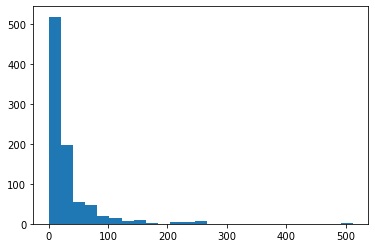

In [400]:
plt.hist(df.Fare, bins=25);

In [402]:
stats, p = shapiro(df.Fare)

In [403]:
if p > alpha:
    print("Amostra parece gaussiana (falhou em rejeitar hipótese nula)")
else:
    print("Amostra não parece gaussiana (rejeitou hipótese)")

Amostra não parece gaussiana (rejeitou hipótese)


##### Tuple Assignment

In [371]:
a, b, c = 1, 2, 3

In [374]:
c

3

In [377]:
def func(dados):
    # calcula teste estatístico se vê se o meu dado segue uma distribuição normal
    return estatistica, p_valor

In [379]:
x, y = func(3, 4)

In [380]:
x

9

In [381]:
y

16